# Libraries

In [1]:
import numpy as np # Numerical computation
import pandas as pd # Dataset manipulation

pd.set_option('display.max_columns', None) # Num of displayed columns

# Visualization tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Libraries version

print('Numpy ver:', np.__version__)
print('Pandas ver:', pd.__version__)
print('Matplotlib ver:', matplotlib.__version__)
print('Seaborn ver:', sns.__version__)

Numpy ver: 1.21.5
Pandas ver: 1.4.2
Matplotlib ver: 3.5.1
Seaborn ver: 0.11.2


# Import Dataset

In [3]:
df = pd.read_csv('../dataset/online_shoppers_intention.csv')

# Overview
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2709,0,0.0,0,0.000000,16,200.000000,0.034375,0.072115,0.000000,0.8,May,2,2,1,1,Returning_Visitor,False,False
6212,3,96.8,0,0.000000,29,2041.626667,0.026075,0.047325,0.000000,0.0,Sep,2,2,3,1,Returning_Visitor,False,False
4929,0,0.0,0,0.000000,6,62.000000,0.133333,0.166667,0.000000,0.0,May,3,2,2,3,Returning_Visitor,False,False
2012,9,183.5,2,29.666667,52,2211.608333,0.008889,0.010252,1.816474,0.0,Mar,4,2,1,2,Returning_Visitor,False,True
1455,0,0.0,0,0.000000,3,183.000000,0.000000,0.066667,0.000000,0.0,Mar,1,1,1,1,Returning_Visitor,True,False


# Exploratory Data Analysis

## Descriptive Statistics

In [4]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Dataset terdiri dari 12330 observasi dan 18 field. Setiap nama kolom sudah merepresentasikan isinya. Setiap field sudah memiliki tipe data yang sesuai dengan konten yang dimuatnya.

In [5]:
# Missing Values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada nilai kosong (missing value) di setiap field.

In [6]:
# Numeric Fields Descriptive Statistics
num_fields = [field for field in df.columns if df[field].dtypes != 'O' and 
              field not in ['OperatingSystems','Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']]

df[num_fields].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [7]:
# Encoded Fields Descriptive Statistics
encoded = [field for field in df.columns if df[field].dtypes != 'O' and 
                     field not in num_fields]

for field in encoded:
    print(field, ':', df[field].nunique(), 'unique values')
    print(df[field].value_counts())

OperatingSystems : 8 unique values
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
Browser : 13 unique values
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
Region : 9 unique values
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
TrafficType : 20 unique values
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
Weekend : 2 unique values
False    9462
True     2868
Name: Weekend, dtype: int64
Revenue : 2 unique values
False    10422
True      1908
Name: Revenue, dtype: int64


In [8]:
# Categorical Fields Descriptive Statistics
cat_fields = [field for field in df.columns if df[field].dtypes == 'O' or df[field].dtypes == 'bool']

df[cat_fields].describe()

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


Summary Analisis Statistik Deskriptif

Fitur numerik

1. Semua fitur numerik *(Andiminstrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, dan SpecialDay)* memiliki nilai **mean dan median yang berbeda**. Kemungkinan fitur-fitur tersebut memiliki **outlier** atau **tidak menyebar normal (skewed)**.
2. Semua fitur yang disebutkan pada poin 1 juga memiliki nilai **maksimum** yang cukup **jauh dari nilai Q3** yang mengindikasikan bahwa fitur-fitur tersebut memiliki **outlier**.
3. Beberapa fitur (Informational, Informational_Duration, PageValues, SpecialDay) terlihat **didominasi oleh nilai 0** dan memiliki nilai **maksimum** yang cukup **besar**. Indikasi kuat bahwa fitur-fitur tersebut memiliki **outlier**.

Fitur Kategorik

1. Kolom target (Revenue) memiliki **2 unique value** namun **sebagian besar (sekitar 85%) bernilai False**. Bisa dipertimbangkan untuk penanganan **data imbalance**.
2. Beberapa fitur kategorik yaitu Browser, Region, dan TrafficType memiliki data yang **terlalu banyak unique value**. Beberapa value minor mungkin bisa dikategorikan sebagai **Other**.
3. Terdapat fitur-fitur yang **didominasi oleh satu unique value** saja seperti OperatingSystems, Browser, VisitorType, dan Weekend. Fitur-fitur tersebut mungkin bisa **tidak disertakan dalam model**.

## Univariate Analysis

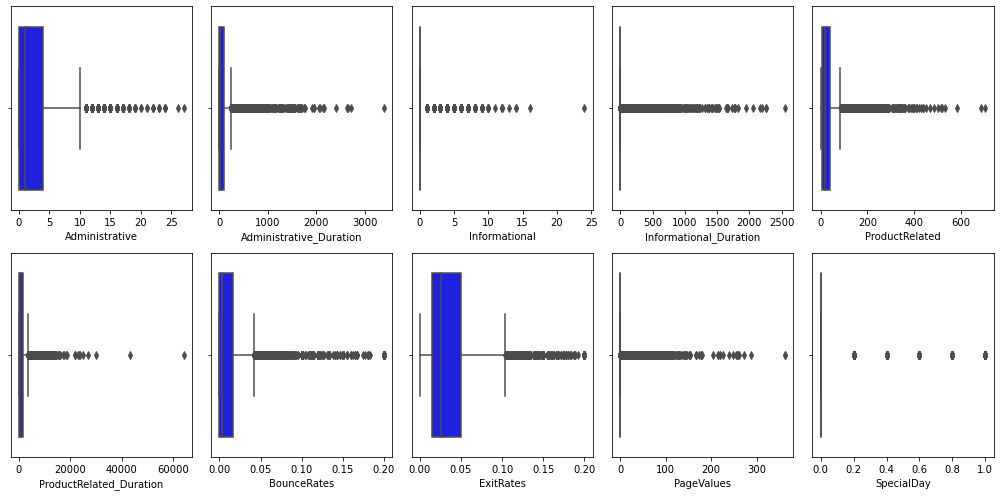

In [9]:
plt.figure(figsize=(14, 7))
for i in range(0, len(num_fields)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x=df[num_fields[i]], color='blue')
    plt.tight_layout()

Selain untuk melihat bentuk sebaran/kepadatan data, fungsi lain boxplot ialah untuk melihat outliers secara lebih teliti untuk itu, dapat dilihat meskipun di kolom Informational, Informational_Duration,PageValues,SpecialDay distribusinya sangat tipis karena sebaran data nya bersifat menumpuk, namun bisa dilihat di kolom2 tersebut memiliki nilai outliers yang cukup banyak.<br>

Administrative : kebanyakan pengguna mengunjungi page ini kurang dari 5 kali, bahkan cenderung jarang yang mengunjungi (nol kali)<br>
Administrative_Duration : pengguna yang banyak menghabiskan waktu mengunjungi page sekitar dibawah 250 detik <br>
Informational : kebanyakan pengguna sangat jarang mengunjungi page ini, jumlah kunjungan sangat dominan di nol (itu sebabnya saat diplot, bentuk sebaran datanya terlihat tipis dan menumpuk di nol).<br>
Informational_Duration : durasi pengguna yang mengunjungi page ini sangat dominan di nol detik<br>
ProductRelated= pengguna banyak mengunjungi web sekitar di bawah 50 kali <br>
ProductRelated_Duration : pengguna yang banyak menghabiskan waktu mengunjungi page sekitar dibawah 5000 detik  <br>
BounceRates : persentase pengguna banyak mengunjungi web dibawah 0.025<br>
ExitRates : persentase pengguna banyak mengunjungi web diantara 0.020 sampai 0.050 <br>

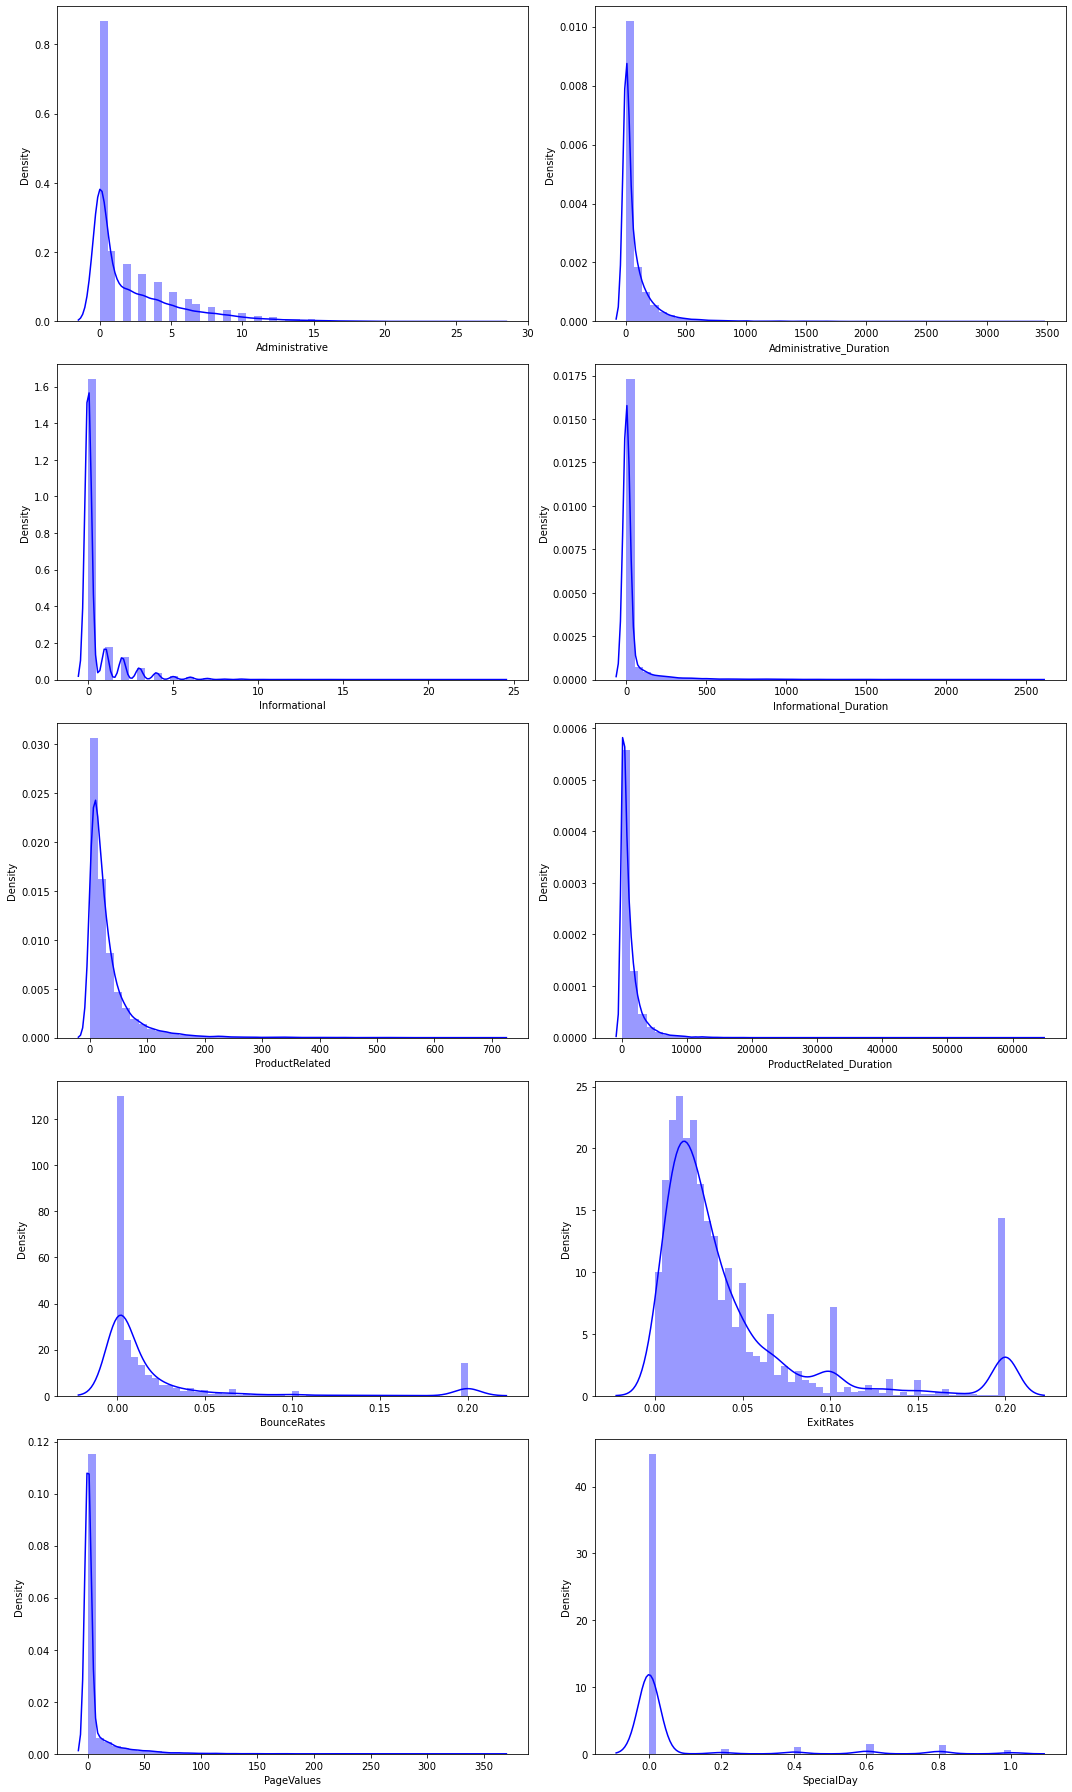

In [10]:
plt.figure(figsize=(15, 25))
for i in range(0, len(num_fields)):
    plt.subplot(5, 2, i+1)
    sns.distplot(df[num_fields[i]], color='blue')
    plt.tight_layout()

Dapat dilihat semua distribusinya menghasilkan positive skewed dan terdapat beberapa lonjakan kecil seperti pada 'Informational','BounceRates','ExitRates','SpecialDay' dan juga terdapat long tail pada 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues'. Dari output distplot, juga dapat disimpulkan diantara ketiga page yang ada di web, pengguna lebih sering mengunjungi page productrelated ketimbang 2 page lainnya. Hal ini bisa dilihat pada range sebaran jumlah kunjungan (x axis) pada page ProductRelated yang sebaran frekuensi kunjungannya lebih tinggi.

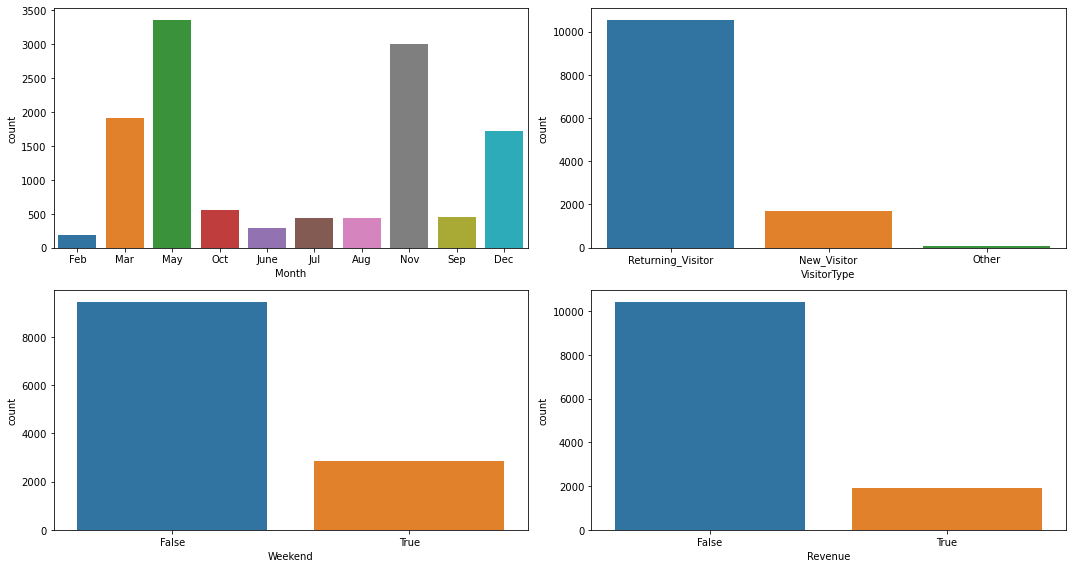

In [11]:
plt.figure(figsize=(15, 8))
for i in range(0, len(cat_fields)):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cat_fields[i]], orient='h')
    plt.tight_layout()

ValueError: num must be 1 <= num <= 4, not 5

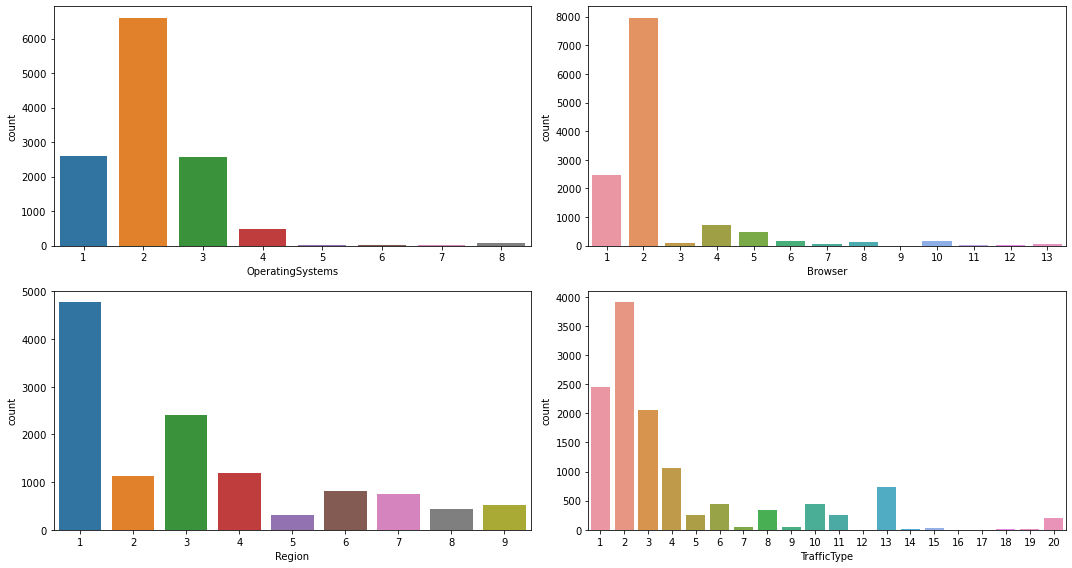

In [12]:
plt.figure(figsize=(15, 8))
for i in range(0, len(encoded)):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[encoded[i]], orient='h')
    plt.tight_layout()

Month : dalam data ini satu tahun hanya terdapat 10 bulan dimana pada bulan januari dan april itu tidak masuk.<br>
Pengguna yang mengunjungi web banyak terdapat pada bulan May dan November dan pengguna yang sepi mengunjungi web terdapat pada bulan February <br>
VisitorType : terdapat 3 tipe pengunjung dimana yang paling mendominasi yaitu pada Returning_visitor yang lebih dari 10000 pngunjung, New_visitor terdapat kurang dari 2000, dan Other merupakan tipe yang paling sedikit. <br>
Weekend : pengguna yang mengunjungi dalam weekend terlihat jauh lebih sedikit yaitu sekitar 3000 dibandingkan yang tidak mengunjungi mencapai lebih dari 8000 <br>
Revenue : pengguna yang Purchase jauh lebih sedikit yaitu sekitar 2000 dibandingkan dengan pengguna yang NotPurchase mencapai lebih dari 10000 <br>

Hal yang harus di follow-up untuk data pre-processing ialah untuk data yang distribusinya tidak normal (skewed) dan mempunyai long tail, maka perlu dinormalisasikan menggunakan transformasi log agar hasil distribusi mendekati distribusi normal.

## Multivariate Analysis

***Heatmap***

<AxesSubplot:>

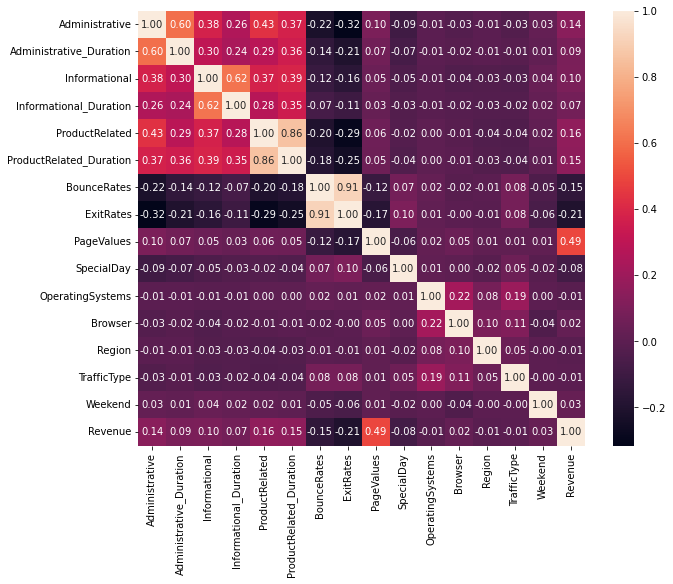

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')


***Feature yang memiliki korelasi dengan target dapat terlihat jelas pada *PageValues*.<br>
featrure yang sama sama berkorelasi kuat adalah exitrate dan bounce rate serta productrelated dan productrelated_duration. Berkemungkinan besar feature yang redundan.***

***Dikarenakan Target atau label merupakan data categorical kita belum bisa memastikan kebermaknaan hubungan target dengan fitur***

## Bi-Variate

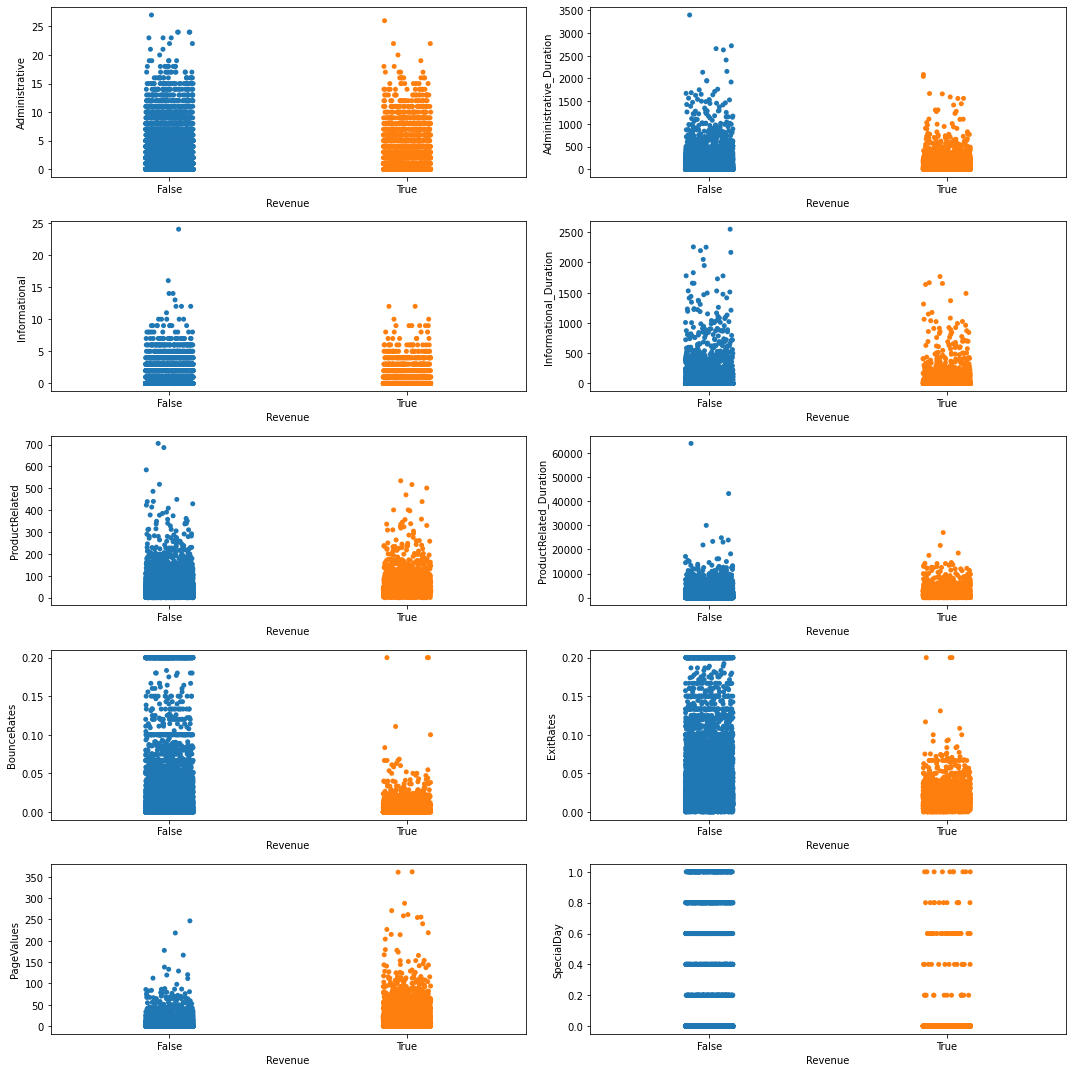

In [16]:
fig = plt.figure(figsize=(15,15))
for i in range(0,len(num_fields)):
    ax = fig.add_subplot(5,2,i+1)
    sns.stripplot(ax=ax, data=df, x='Revenue', y=num_fields[i])
    plt.tight_layout()

Pada feature numerical terhadap target dapat 'PageValue','ExitRate','BounceRate' memiliki korelasi yang sangat terlihat.<br>
**PageValue** = semakin besar page value semakin besar juga kemungkinan visitor untuk purchase<br>
**bouncerate dan exitrate** = korelasi yang berbanding terbalik, semakin besar bouncerate atau exitrate semakin kecil kemungkinan visior untuk purchase

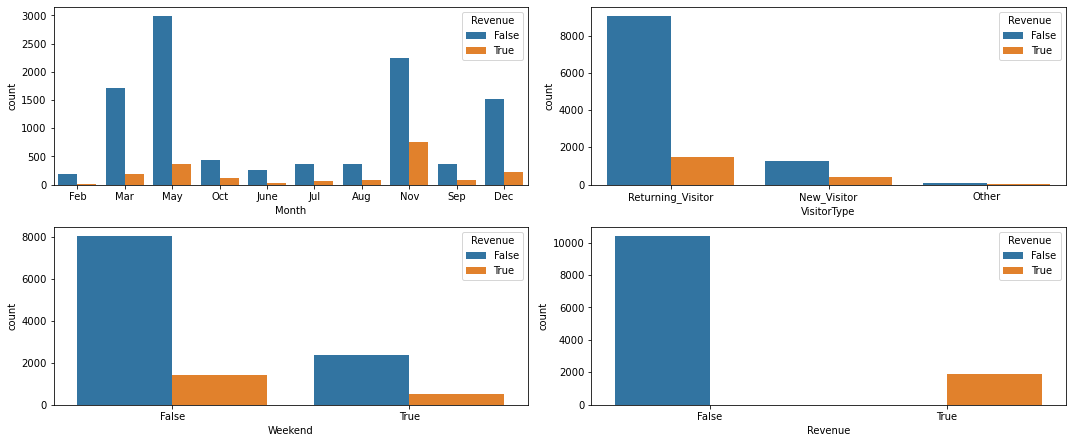

In [17]:
fig = plt.figure(figsize=(15,15))
for i in range(0,len(cat_fields)):
    ax = fig.add_subplot(5,2,i+1)
    sns.countplot(ax=ax, data=df, x=cat_fields[i],hue='Revenue')
    plt.tight_layout()

Penggambaran yang cukup significant menggambarkan feature terhadap target adalah:<br>
**visitortype** = segmentasi tipe customer paling tinggi memiliki kenecnderungan untuk membeli adalah new_customer<br>



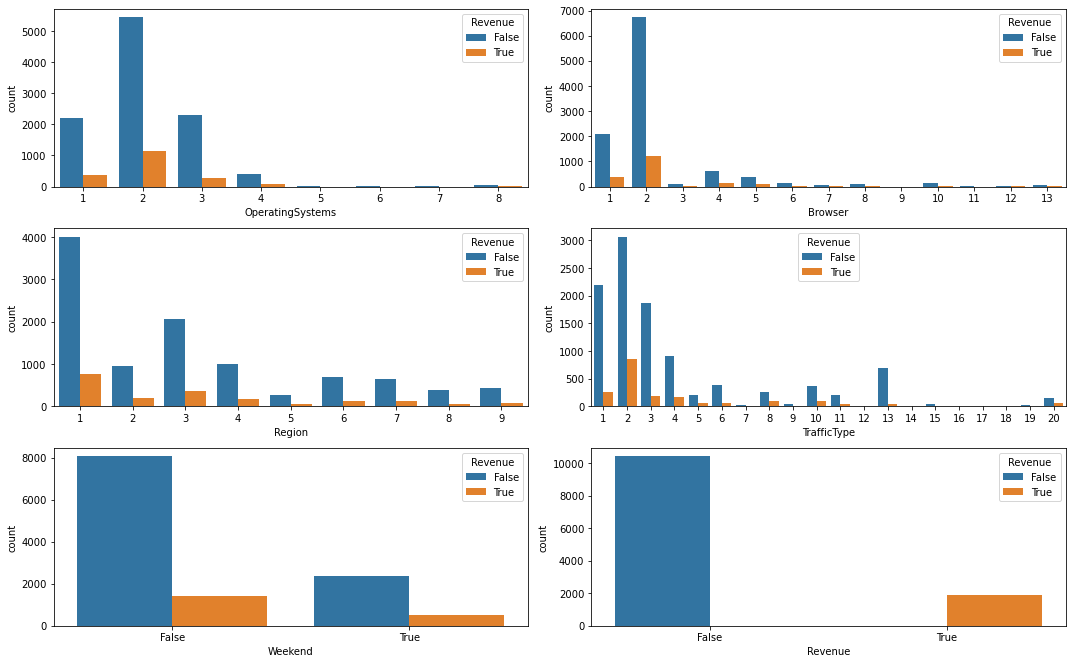

In [18]:
fig = plt.figure(figsize=(15,15))
for i in range(0,len(encoded)):
    ax = fig.add_subplot(5,2,i+1)
    sns.countplot(ax=ax, data=df, x=encoded[i],hue='Revenue')
    plt.tight_layout()

Penggambaran yang cukup significant menggambarkan feature terhadap target adalah:<br>
**triffictype** = ada tipe traffic yang mendominasi diantara traffic lainnya<br>
**Region** = persebran daerah cukup significant terhadap masing masing daerah dimana ada daerah yang jauh lebih dominan<br>
**Operatingsystem dan browser** = didominasi oleh 2 sampai 3 value saja

### Summary

1.Terdapat beberapa korelasi yang cukup terlihat cukup significant seperti pagevalue,exitrate dan bouncerate<br>
2.Feature categorical terhadap target masih didominasi oleh beberapa value saja visitortype dapat dijadikan insight yang bagus karena jumlah presentase purchsed new_visitor terhadapt categorynya merupakan yang paling besar diantara category lainnya<br>

***Action***<br>
1.Pembersihan/normalize/transformasi outlier<br>
2.Mengubah Target dan beberapa feature menjadi numerical agar dapat mendapatkan insight lebih terhadap korelasi antar feature dan target.


korelasi positif. exit rate / bounce rate 0.91

Perusahaan harus benar-benar melakukan evaluasi terhadap webiste, Pasalnya rendahnya angka pengunjung bertahan dalam website Anda yang disertai dengan bounce rate ataupun angka exit yang tinggi ini menunjukkan beberapa kemungkinan seperti:
Kecepatan halaman yang lambat, desain halaman yang menganggu ataupun tidak aplikatif, halaman website yang tidak responsif pada device seluler, konten yang tidak berkualitas ataupun konten di dalam halaman yang nyatanya tidak memenuhi harapan pengunjung situs Anda.


korelasi negatif exit rate dan administratif -0.32

Kemungkinan besar pengunjung hanya datang hanya melihat lihatr dan tidak tertarik untuk melanjutkan administrasi menjadi member karna tampilan web tidak menarik, lambat, dan tidak responsif.


## Business Insight

In [19]:
df['Purchased?'] = np.where (df['Revenue'] == True, 'Beli','Gak Beli')

df['Bulan'] = df['Month'].replace(
    {'Jan': '1',
    'Feb': '2', 
    'Mar': '3', 
    'Apr': '4',
    'May': '5', 
    'June': '6', 
    'Jul': '7', 
    'Aug': '8', 
    'Sep': '9', 
    'Oct': '10', 
    'Nov': '11', 
    'Dec': '12',
    }).astype(int)


## Visitor & Revenue by Month

In [20]:
df2 = df.groupby(['Bulan','Month']).agg({'Revenue':'count'}).reset_index()
df2

df3 = df.groupby(['Bulan','Month','Purchased?']).agg({'Revenue':'count'}).reset_index()
df3 = df3[(df3['Purchased?']=='Beli')]
df3

,Bulan,Month,Purchased?,Revenue
0,2,Feb,Beli,3
2,3,Mar,Beli,192
4,5,May,Beli,365
6,6,June,Beli,29
8,7,Jul,Beli,66
10,8,Aug,Beli,76
12,9,Sep,Beli,86
14,10,Oct,Beli,115
16,11,Nov,Beli,760
18,12,Dec,Beli,216


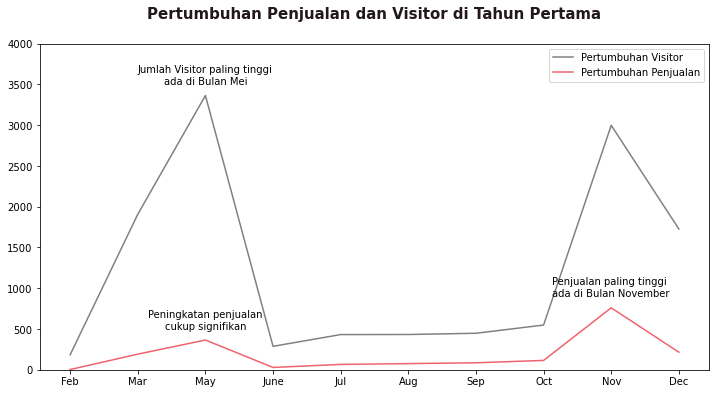

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df2['Month'], df2['Revenue'], color = 'grey', label = 'Pertumbuhan Visitor')
plt.plot(df3['Month'], df3['Revenue'], color = '#ef626c', label = 'Pertumbuhan Penjualan')
plt.text('May',3500, s='Jumlah Visitor paling tinggi\nada di Bulan Mei',horizontalalignment = 'center')
plt.ylim(0,4000)
plt.legend(loc=1)

plt.text('May',500, s='Peningkatan penjualan\ncukup signifikan', horizontalalignment = 'center')
plt.text('Nov',900, s='Penjualan paling tinggi \nada di Bulan November',horizontalalignment = 'center')

#### Title
plt.title('Pertumbuhan Penjualan dan Visitor di Tahun Pertama', color = '#22181c',
         weight = 700, fontsize = 15, pad = 25)

plt.show()

## Total by Visitor Type

In [ ]:
df4 = df.groupby(['VisitorType']).agg({'Revenue':'count'}).reset_index()
df4

In [ ]:
sns.barplot(x = 'VisitorType', 
            y = 'Revenue',
            data = df4)

## Revenue by Visitor Type

In [ ]:
df5 = df.groupby(['VisitorType','Purchased?']).agg({'Revenue':'count'}).reset_index()
df5

In [ ]:
df_agg = df.groupby(['VisitorType', 'Revenue']).agg({
    'Administrative' : 'count'
}).reset_index()

num_nv = df['VisitorType'].value_counts()[1] ## jumlah new visitor
num_rv = df['VisitorType'].value_counts()[0] ## jumlah returning visitor
num_ov = df['VisitorType'].value_counts()[2] ## jumlah other

df_agg['Pct'] = np.where(df_agg['VisitorType'] == 'New_Visitor', df_agg['Administrative']/num_nv,
                        np.where(df_agg['VisitorType'] == 'Returning_Visitor', df_agg['Administrative']/num_rv, 
                                df_agg['Administrative']/num_ov))
df_agg['Pct'] = np.round(df_agg['Pct'] * 100, 2)
df_agg.drop('Administrative', axis = 1)

df_pvt = df_agg.pivot_table(index = 'VisitorType',
                           columns = 'Revenue',
                           values = 'Pct')

### Viz
fig, ax = plt.subplots()

df_pvt.plot(kind = 'barh', stacked = 'True', color = ['#da2c38', '#226f54'], figsize = (10,8), ax = ax, legend = None)

plt.ylabel('')

ax.set(frame_on = False)
fig.patch.set_facecolor('#eeeeee') ## Warna background

plt.show()

In [ ]:
df

In [23]:
from scipy import stats

## Drop Outliers

### pakai ZScore

In [13]:
print({len(df)})

{12330}


In [24]:
filtered_entries = np.array([True] * len(df))

for col in ['ExitRates']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]
print({len(df)})

{11617}


<AxesSubplot:xlabel='ExitRates', ylabel='Density'>

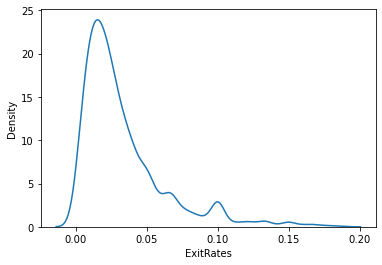

In [42]:
#distribusi Exitrates (nilai asli)

sns.kdeplot (df['ExitRates'])


<AxesSubplot:xlabel='ExitRates', ylabel='Density'>

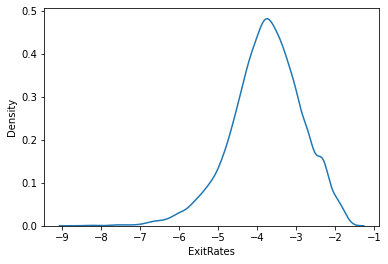

In [26]:
#distribusi Exitrates (setelah log transformation)

sns.kdeplot (np.log(df['ExitRates']))

### Rescaling

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['ExitRates_norm'] = MinMaxScaler().fit_transform(df['ExitRates'].values.reshape(len(df),1))

df['ExitRates_std'] = StandardScaler().fit_transform(df['ExitRates'].values.reshape(len(df),1))

df[['ExitRates','ExitRates_norm','ExitRates_std']].describe()


,ExitRates,ExitRates_norm,ExitRates_std
count,11617.000000,11617.000000,1.161700e+04
mean,0.033444,0.179164,-1.688510e-16
std,0.030051,0.160988,1.000043e+00
min,0.000000,0.000000,-1.112950e+00
25%,0.013416,0.071873,-6.664815e-01
50%,0.024206,0.129673,-3.074323e-01
75%,0.042308,0.226648,2.949712e-01
max,0.186667,1.000000,5.098968e+00


In [28]:
df['ExitRates_norm'] = MinMaxScaler().fit_transform(df['ExitRates'].values.reshape(len(df),1))

df['ExitRates_std'] = StandardScaler().fit_transform(df['ExitRates'].values.reshape(len(df),1))


In [29]:
df[['ExitRates','ExitRates_norm','ExitRates_std']].describe()

,ExitRates,ExitRates_norm,ExitRates_std
count,11617.000000,11617.000000,1.161700e+04
mean,0.033444,0.179164,-1.688510e-16
std,0.030051,0.160988,1.000043e+00
min,0.000000,0.000000,-1.112950e+00
25%,0.013416,0.071873,-6.664815e-01
50%,0.024206,0.129673,-3.074323e-01
75%,0.042308,0.226648,2.949712e-01
max,0.186667,1.000000,5.098968e+00


### Label Encoding

<AxesSubplot:>

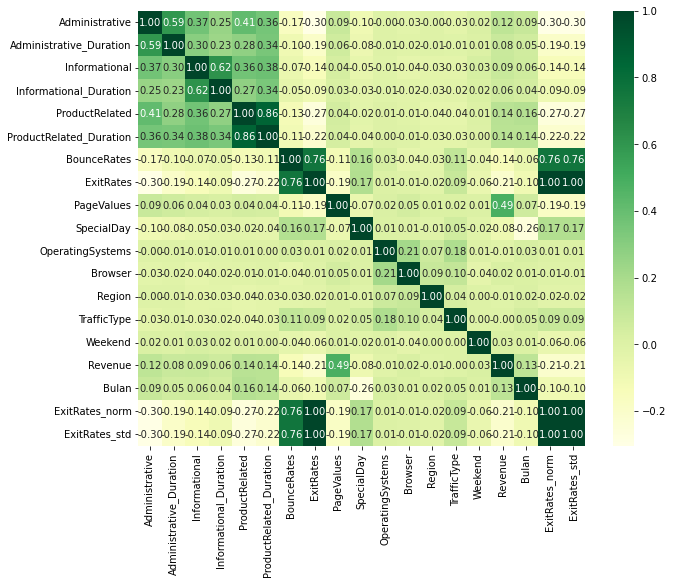

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap = 'YlGn' , annot=True,fmt='.2f')

>0.6 <br>
Administrative - Administrative Duration <br>
Informational - Informational Duration<br>
Product Related - ProductRelated Duration <br>
BounceRates - Exit Rates <br>

In [31]:
##drop columns
drop_columns = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','ExitRates']


#pemisahan features vs target
x = df.drop(drop_columns, axis=1)
y = df['Revenue']

In [32]:
#pemisahan features vs target

x = df.drop(drop_columns, axis=1)
y = df['Revenue']

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11617 entries, 1 to 12329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    11617 non-null  int64  
 1   Informational     11617 non-null  int64  
 2   ProductRelated    11617 non-null  int64  
 3   BounceRates       11617 non-null  float64
 4   PageValues        11617 non-null  float64
 5   SpecialDay        11617 non-null  float64
 6   Month             11617 non-null  object 
 7   OperatingSystems  11617 non-null  int64  
 8   Browser           11617 non-null  int64  
 9   Region            11617 non-null  int64  
 10  TrafficType       11617 non-null  int64  
 11  VisitorType       11617 non-null  object 
 12  Weekend           11617 non-null  bool   
 13  Revenue           11617 non-null  bool   
 14  Purchased?        11617 non-null  object 
 15  Bulan             11617 non-null  int32  
 16  ExitRates_norm    11617 non-null  float6

In [36]:
pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.
